In [1]:
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/requierements.ipynb

In [47]:
SSH_01 = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/CALEDO60-TRPC12NT0_y2014m02d01-d28.1h_SSH.nc')
SSU_01 = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/CALEDO60-TRPC12NT0_y2014m02d01-d28.1h_SSH.nc')
SSV_01 = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/CALEDO60-TRPC12NT0_y2014m02d01-d28.1h_SSH.nc')
mask = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/1_mesh_mask_TROPICO12_L125_tr21.nc',drop_variables={"x","y"}) 

SSH_01_masked = SSH_01['zos'].where(mask.tmaskutil[0,:,:] == 1, np.nan).load()
SSU_01_masked = SSU_01['uos'].where(mask.tmaskutil[0,:,:] == 1, np.nan).load()
SSV_01_masked = SSV_01['vos'].where(mask.tmaskutil[0,:,:] == 1, np.nan).load()

KeyError: "No variable named 'uos'. Variables on the dataset include ['nav_lat', 'nav_lon', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'zos']"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Assuming SSH_01, SSU_01, and SSV_01 are loaded datasets and 'date' is the selected date
date = '2014-02-01T00:30:00'
ssh = SSH_01_masked.sel(time_counter=date)  # SSH data
u = SSU_01_masked.sel(time_counter=date)  # SSU data
v = SSV_01_masked.sel(time_counter=date)  # SSV data

# Define fixed colorbar values
colorbar_min = 0  # Set your desired minimum value here
colorbar_max = 1.4  # Set your desired maximum value here

# Calculate the magnitude of the velocity
magnitude = np.sqrt(u**2 + v**2)

# Create a mask for zero magnitude values
zero_magnitude_mask = magnitude == 0

# Extract latitude and longitude coordinates
lat = SSH_01['nav_lat']
lon = SSH_01['nav_lon']

# Create a copy of the colormap
cmap = cmocean.cm.deep.copy()
# Set NaN values to black
cmap.set_bad(color='black')

# Plotting
fig, ax = plt.subplots()

# Ensure that NaN values are represented as black
ssh_plot = ax.pcolormesh(lon, lat, ssh, shading='auto', cmap=cmap, vmin=colorbar_min, vmax=colorbar_max)

# Position the colorbar on the right and adjust its height to match the plot
cbar = fig.colorbar(ssh_plot, ax=ax, label='SSH (m)', location='right', shrink=1.0)

# Adjusting quiver for better visualization and reducing arrowhead size
step_size = 12  # Adjust step size as needed for clarity
quiver_scale = 27  # Adjust scale to control overall arrow size
headlength = 3  # Reduce head length
headwidth = 3  # Reduce head width
headaxislength = 2  # Reduce head axis length
arrow_thickness = 0.1  # Adjust arrow thickness; increase for thicker arrows
arrow_color = 'black'  # Specify arrow color; can be a name, hex, or RGB tuple

# Overlay velocity vectors on the SSH background
ax.quiver(lon[::step_size, ::step_size], lat[::step_size, ::step_size], u[::step_size, ::step_size], v[::step_size, ::step_size], 
           scale=quiver_scale, headlength=headlength, headwidth=headwidth, headaxislength=headaxislength, linewidths=arrow_thickness, color=arrow_color)

# Set latitude labels on the right
ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")
ax.set_ylabel('Latitude')

# Set longitude labels on the bottom
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.set_xlabel('Longitude')

# Title and aspect
ax.set_title('SSH and Velocity Vector Field')
ax.set_aspect('equal', adjustable='box')

plt.show()


KeyError: "not all values found in index 'time_counter'. Try setting the `method` keyword argument (example: method='nearest')."

In [13]:
dataset = GEBCO

# Extract metadata for variables
variables_info = {}
for var_name, variable in dataset.variables.items():
    if hasattr(variable, 'units'):
        variables_info[var_name] = variable.units
    else:
        variables_info[var_name] = 'No units attribute'

variables_info

{'lat': 'No units attribute',
 'lon': 'No units attribute',
 'elevation': 'No units attribute'}

/tmp/ipykernel_1734249/3439997033.py:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ssh_plot = ax.pcolormesh(lon, lat, ssh, shading='auto', cmap=cmap, vmin=colorbar_min, vmax=colorbar_max)


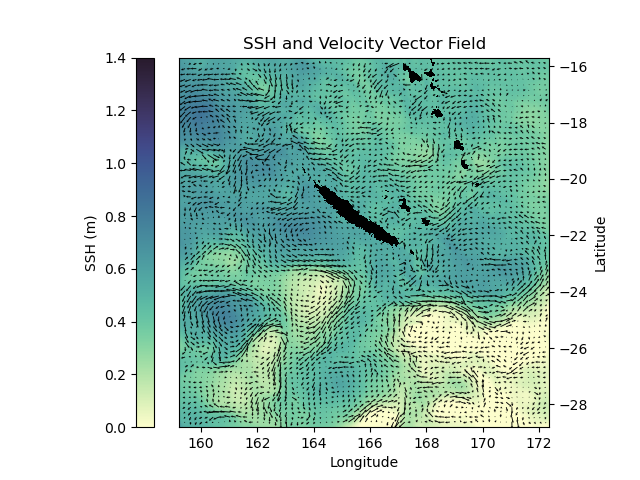

In [11]:
# Assuming SSH_01, SSU_01, and SSV_01 are loaded datasets and 'date' is the selected date
date = '2014-01-15T00:30:00'
ssh = SSH_01_masked.sel(time_counter=date)  # SSH data
u = SSU_01_masked.sel(time_counter=date)  # SSU data
v = SSV_01_masked.sel(time_counter=date)  # SSV data

# Define fixed colorbar values
colorbar_min = 0  # Set your desired minimum value here
colorbar_max = 1.4   # Set your desired maximum value here

# Calculate the magnitude of the velocity
magnitude = np.sqrt(u**2 + v**2)

# Create a mask for zero magnitude values
zero_magnitude_mask = magnitude == 0

# Extract latitude and longitude coordinates
lat = SSH_01['nav_lat']
lon = SSH_01['nav_lon']

# Create a copy of the colormap
cmap = cmocean.cm.deep.copy()
# Set NaN values to black
cmap.set_bad(color='black')

# Plotting
fig, ax = plt.subplots()

# Ensure that NaN values are represented as black
ssh_plot = ax.pcolormesh(lon, lat, ssh, shading='auto', cmap=cmap, vmin=colorbar_min, vmax=colorbar_max)

# Position the colorbar on the left
cbar = fig.colorbar(ssh_plot, ax=ax, label='SSH (m)', location='left', shrink=1, pad=0.05)


# Plot black dots where the velocity magnitude is zero
#ax.scatter(lon.values[zero_magnitude_mask], lat.values[zero_magnitude_mask], color='black', s=1)  # s is the size of the dot

# Adjusting quiver for better visualization and reducing arrowhead size
step_size = 12  # Adjust step size as needed for clarity
quiver_scale = 27  # Adjust scale to control overall arrow size
headlength = 3  # Reduce head length
headwidth = 3  # Reduce head width
headaxislength = 2  # Reduce head axis length
arrow_thickness = 0.1  # Adjust arrow thickness; increase for thicker arrows
arrow_color = 'black'  # Specify arrow color; can be a name, hex, or RGB tuple

# Overlay velocity vectors on the SSH background
ax.quiver(lon[::step_size, ::step_size], lat[::step_size, ::step_size], u[::step_size, ::step_size], v[::step_size, ::step_size], 
           scale=quiver_scale, headlength=headlength, headwidth=headwidth, headaxislength=headaxislength, linewidths=arrow_thickness, color=arrow_color)

# Set latitude labels on the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('Latitude')

# Set longitude labels as needed
ax.set_xlabel('Longitude')
ax.xaxis.set_label_position('bottom')  # Ensures label is below the axis

# Title and aspect
ax.set_title('SSH and Velocity Vector Field')
ax.set_aspect('equal', adjustable='box')

plt.show()



## GEBCO

In [2]:
GEBCO = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/GEBCO_05_Mar_2024_5ebc668e5818/gebco_2023_n-16.0_s-28.0_w160.0_e172.0.nc")

In [31]:
GEBCO

<xarray.Dataset> Size: 17MB
Dimensions:    (lat: 2880, lon: 2880)
Coordinates:
  * lat        (lat) float64 23kB -28.0 -27.99 -27.99 ... -16.01 -16.01 -16.0
  * lon        (lon) float64 23kB 160.0 160.0 160.0 160.0 ... 172.0 172.0 172.0
Data variables:
    elevation  (lat, lon) int16 17MB dask.array<chunksize=(2880, 2880), meta=np.ndarray>
Attributes: (12/36)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    references:                      DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    node_offset:                     1.0

In [18]:
# Extract the necessary coordinates from the mask dataset
lon_mask = mask.glamt.isel(time_counter=0)
lat_mask = mask.gphit.isel(time_counter=0)

# Interpolate GEBCO data to the mask grid
elevation_interpolated = GEBCO.elevation.interp(
    lon=(lon_mask),
    lat=(lat_mask),
    method='linear'  # You can choose 'nearest' for a different approach
)

# Select the mask and apply it
mask_data = mask.tmaskutil.isel(time_counter=0)
gebco_masked = elevation_interpolated.where(mask_data == 1, np.nan)

/tmp/ipykernel_1462470/3169760356.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cax = plt.pcolormesh(gebco_masked.lon, gebco_masked.lat, gebco_masked, shading='auto', cmap=cmap, vmin=-6000, vmax=0)


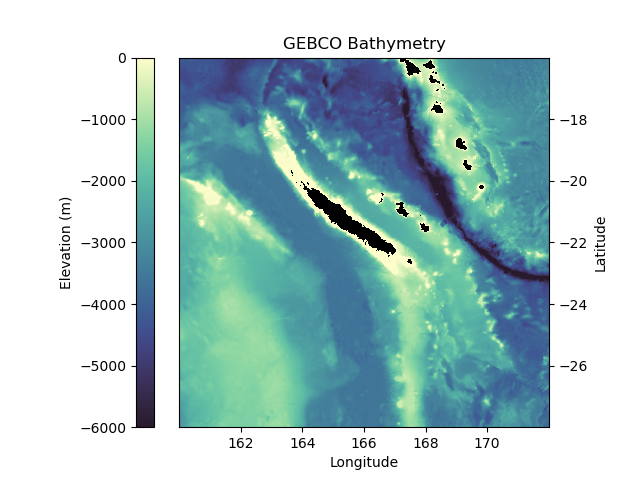

In [33]:
# Create a copy of the colormap
cmap = cmocean.cm.deep_r.copy()
# Set NaN values to black
cmap.set_bad(color='black')

# Create a gradient plot of bathymetry
plt.figure()

# Create the pcolormesh plot with inverted colormap and specified limits
cax = plt.pcolormesh(gebco_masked.lon, gebco_masked.lat, gebco_masked, shading='auto', cmap=cmap, vmin=-6000, vmax=0)

# Set aspect of the plot to be equal and adjust plot limits to avoid NaNs at the edges
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(GEBCO.lon.min(), GEBCO.lon.max())
plt.ylim(GEBCO.lat.min(), GEBCO.lat.max())

# Move ticks and labels for latitude to the right
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
# Add color bar on the left
cbar = plt.colorbar(cax, label='Elevation (m)', location='left', pad=0.05)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GEBCO Bathymetry')
plt.show()

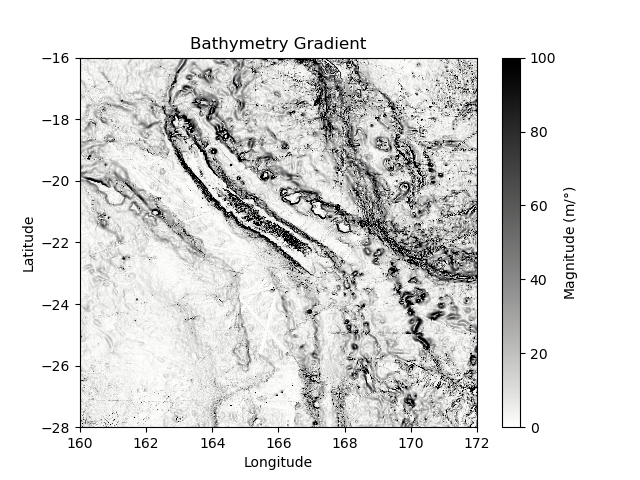

In [45]:
# Calculate the gradients along the latitude and longitude
grad_lat, grad_lon = np.gradient(GEBCO['elevation'])

# Calculate the magnitude of the gradient
grad_magnitude = np.sqrt(grad_lat**2 + grad_lon**2)

# Determine the min and max values of the gradient magnitude
vmin = np.min(grad_magnitude)
vmax = 100

# Plot the gradient magnitude with specified vmin and vmax
plt.figure()
plt.pcolormesh(GEBCO['lon'], GEBCO['lat'], grad_magnitude, shading='auto', cmap=cmocean.cm.gray_r, vmin=vmin, vmax=vmax)
plt.colorbar(label='Magnitude (m/$\\degree$)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Gradient')
plt.show()

In [7]:
dataset = GEBCO

# Extract metadata for variables
variables_info = {}
for var_name, variable in dataset.variables.items():
    if hasattr(variable, 'units'):
        variables_info[var_name] = variable.units
    else:
        variables_info[var_name] = 'No units attribute'

variables_info

{'lat': 'No units attribute',
 'lon': 'No units attribute',
 'elevation': 'No units attribute'}